<a href="https://colab.research.google.com/github/trantoan62/AI-toi-t4/blob/main/2ndDegreesRoboticArm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#l1 = 10, l2 = 40, l3 = 20

In [ ]:
# bài 4: robot 2 bậc tự do oxy như sgk l1 = 50, l2 = 40, tt1, tt2. -> theta 1, theta 2, px, py 
# px = l1.cos(tt1) +l2.cos(tt1+tt2)
# py = l1.sin(tt1) +l2.sin(tt1+tt2)
# tạo 1 data động học thuận xài hàm for -> nhờ training bằng kq động học thuận

In [ ]:
# bài 5: robot 3 bậc tự do như trên + 1 bậc trên oxy, tt1, tt2, tt3 => px, py, góc phi là góc định hướng
# px = l1.c1 + l2.c12 + l3.c123
# px = l1.c1 + l2.c12 + l3.c123
# phi = tt1 + tt2 + tt3

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [ ]:
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense,Activation,Dropout
from tensorflow.keras.optimizers import RMSprop
from keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from tensorflow import keras

In [ ]:
l1 = 10
l2 = 40
Px = []
Py= []
tt1 =[]
tt2 =[]

In [ ]:
for i in np.arange(0, 360, 1):
    for j in np.arange(0, 360, 1):
      x = l1*np.cos(np.radians(i)) + l2*np.cos(np.radians(i+j))
      y = l1*np.sin(np.radians(i)) + l2*np.sin(np.radians(i+j))
      px.append(x)
      py.append(y)
      tt1.append(i)
      tt2.append(j)

In [ ]:
Px = np.array([px])
Py = np.array([py])
Tt1= np.array([tt1])
Tt2 = np.array([tt2])

In [ ]:
Px.shape

(1, 129600)

In [ ]:
result = np.concatenate((Tt1.T, Tt2.T),axis =1)
train = np.concatenate((Px.T, Py.T),axis =1)
result.shape

(129600, 2)

In [ ]:
x_train = result[0:90720,:]
y_train = train[0:90720,:]
x_test = result[90720:129600,:]
y_test = train[90720:129600,:]

In [ ]:
model=Sequential()
model.add(Dense(512, activation='relu', input_shape=(2,)))
model.add(Dense(512, activation='relu'))
model.add(Dense(2, activation='linear'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               1536      
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dense_2 (Dense)             (None, 2)                 1026      
                                                                 
Total params: 265,218
Trainable params: 265,218
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss = ['mae'], 
              optimizer = 'Adam', 
              metrics = ['accuracy'])

In [ ]:
history = model.fit(x_train, y_train, batch_size=128, epochs=200, verbose=1, validation_data=(x_test,y_test))

Epoch 1/200
709/709 [==============================] - 6s 4ms/step - loss: 22.3688 - accuracy: 0.6160 - val_loss: 44.2587 - val_accuracy: 0.4150
Epoch 2/200
709/709 [==============================] - 3s 4ms/step - loss: 17.9843 - accuracy: 0.7118 - val_loss: 46.6923 - val_accuracy: 0.4515
Epoch 3/200
709/709 [==============================] - 3s 4ms/step - loss: 7.7755 - accuracy: 0.9202 - val_loss: 34.5734 - val_accuracy: 0.5683
Epoch 4/200
709/709 [==============================] - 3s 4ms/step - loss: 4.2557 - accuracy: 0.9678 - val_loss: 30.5889 - val_accuracy: 0.6299
Epoch 5/200
709/709 [==============================] - 2s 3ms/step - loss: 3.1303 - accuracy: 0.9731 - val_loss: 24.5664 - val_accuracy: 0.6682
Epoch 6/200
709/709 [==============================] - 3s 4ms/step - loss: 2.5987 - accuracy: 0.9749 - val_loss: 21.9912 - val_accuracy: 0.6665
Epoch 7/200
709/709 [==============================] - 3s 4ms/step - loss: 2.2289 - accuracy: 0.9762 - val_loss: 21.4751 - val_accurac

In [ ]:
Score = model.evaluate(x_test,y_test,verbose = 1)

1215/1215 [==============================] - 3s 2ms/step - loss: 19.1293 - accuracy: 0.7213


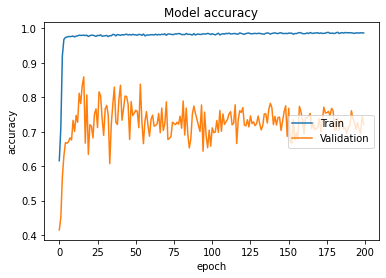

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train','Validation'], loc ='center right')
plt.show()

In [ ]:
model.save('2ndDegreesRoboticArm.h5')

In [ ]:
y_pred = model.predict(x_train)